<a href="https://colab.research.google.com/github/tree-jhk/Atrous-Convolution-calculation-implement/blob/main/Atrous_Convolution_calculation_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert normal NxN kernel to atrous kernel

In [1]:
# a function that converts NxN kernel to atrous kernel
def kernel_to_atrous_kernel(kernel, d):
  import numpy as np
  kernel_size = np.shape(kernel)[0]#getting the size of kernel(filter), as it is sqaure matrix we just get the height
  atrous_kernel = np.zeros(((kernel_size - 1)*d+1)*((kernel_size - 1)*d+1))#prepare an array that is initialized to zero, having atrous_kernel size
  atrous_kernel = np.reshape(atrous_kernel, ((kernel_size - 1)*d+1,(kernel_size - 1)*d+1))#reshape [atrous_kernel] array to a sqaure matrix
  for i in range(0, kernel_size):
    for j in range(0, kernel_size):
      atrous_kernel[d*i,d*j] = kernel[i,j]#fill atrous_kernel's point that matches with the kernel's element
  return atrous_kernel

# Algortihm to calculate Atrous Convolution

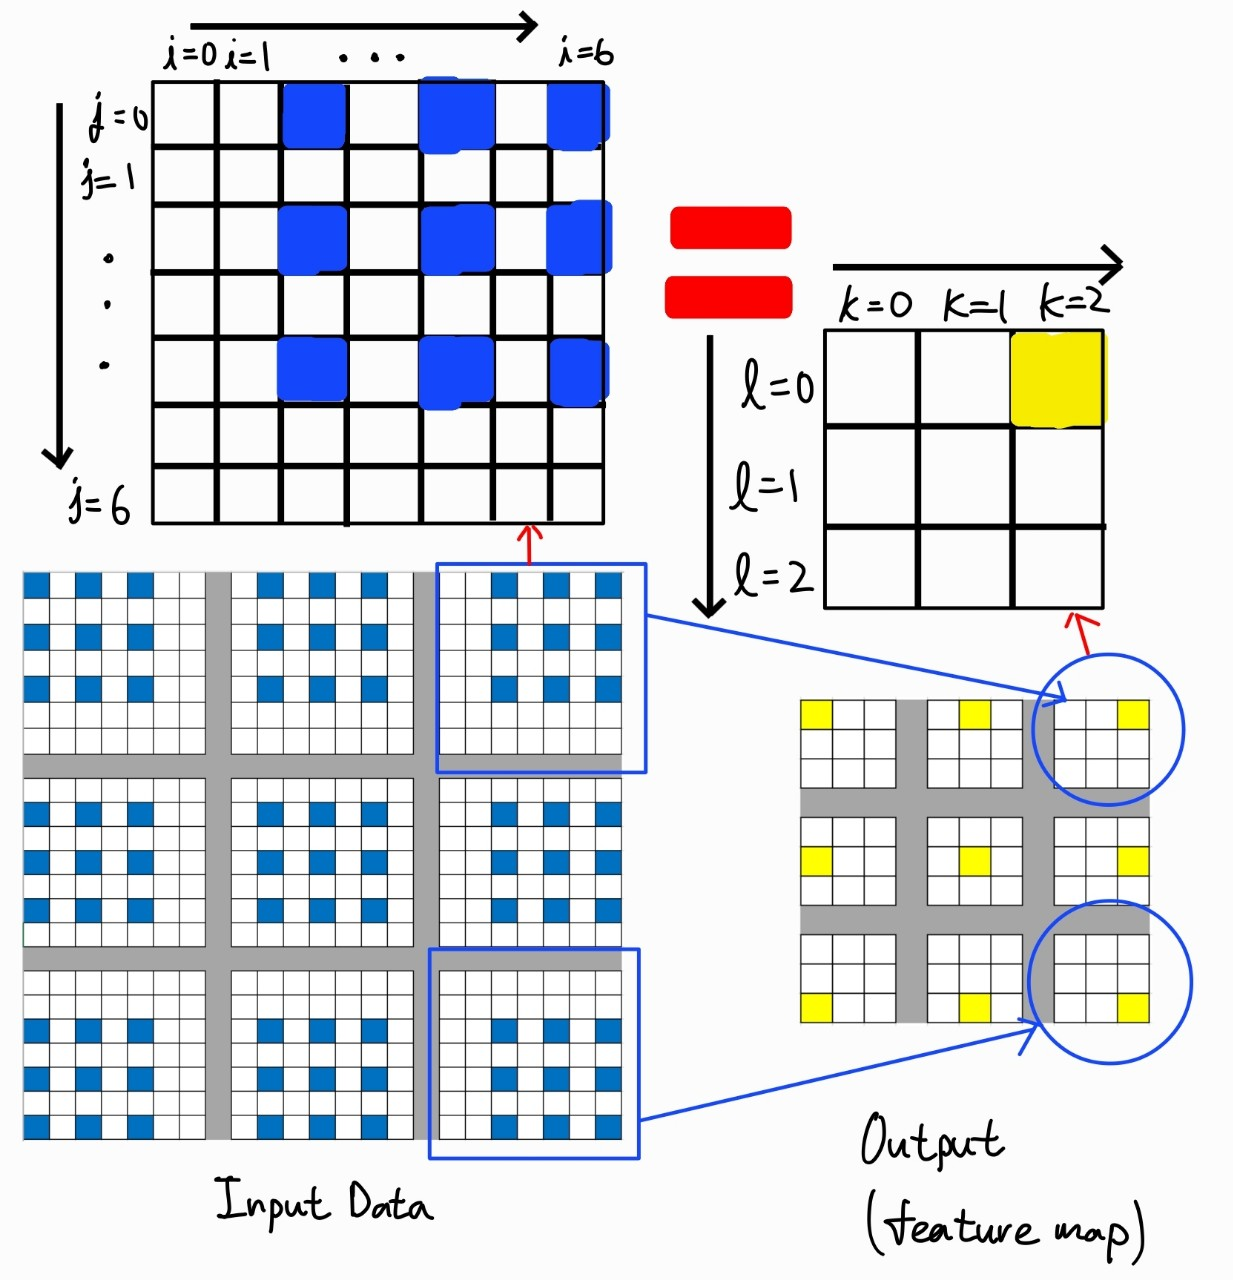



First, calculate one element of the feature map.(To do this, use atrous_sum)  
Second, append every element of the feature map(which is the output).  
Third, reshape the output (use np.reshape)

In [3]:
def atrous_sum(input,atrous_kernel,k,l,size_of_old_kernel,dilation):
  import numpy as np
  sum = 0
  cnt = 0
  for i in range(k,(size_of_old_kernel - 1) * dilation + k + 1, dilation):
   for j in range(l,(size_of_old_kernel - 1) * dilation + l + 1, dilation):
     sum += input[i,j]*atrous_kernel[i - k,j - l]
  return sum

# def atrous_convolution(input, atrous_kernel, stride, dilation):

Major fucntion in it
1. Checking if convolution is available
2. If so, then calculate

In [4]:
def atrous_convolution(input, atrous_kernel, stride, dilation):
  import numpy as np
  input_x, input_y = np.shape(input)
  atrous_kernel_size = np.shape(atrous_kernel)[0]
#checking if convolution is available
  if (input_x - atrous_kernel_size)%stride == 0 and (input_y - atrous_kernel_size)%stride == 0:
    print("convolution available")
  else:
    print("convolution not available")
    print("(input_x - atrous_kernel_size) % stride = ", (input_x - atrous_kernel_size)%stride)
    print("(input_y - atrous_kernel_size) % stride = ", (input_y - atrous_kernel_size)%stride)
    return
#if convolution is available then, do the calculation
  output = []
  output_width = int((input_x - atrous_kernel_size) / stride) + 1
  output_height = int((input_y - atrous_kernel_size) / stride) + 1
  size_of_old_kernel = int((atrous_kernel_size - 1)/dilation) + 1
  for k in range(0, output_width):
    for l in range(0, output_height):
      output.append(atrous_sum(input,atrous_kernel,k,l,size_of_old_kernel,dilation))
#calculating output's width and height
  print("size of output = (%s, %s)" %(output_width, output_height))
  output = np.array(output).reshape(output_width, output_height)
  return output

# example

In [5]:
import numpy as np
input = np.array([[1,2,3,0,-1,2,1],[0,1,2,3,-1,0,2],[3,0,1,2,-1,2,1],[2,3,0,1,-1,-1,0],[2,3,0,1,-1,-2,1],[2,3,0,1,-1,0,-1],[-1,-2,-3,1,0,2,1]])
kernel = np.array([[2,0,9],[0,1,8],[1,0,7]])
dilation = 2
atrous_kernel = kernel_to_atrous_kernel(kernel,dilation)
print('--input--\n',input)
print('\n--atrous_kernel--\n',atrous_kernel,'\n')
print(atrous_convolution(input,atrous_kernel,1,dilation))
atrous_convolution(input,atrous_kernel,2,dilation)

--input--
 [[ 1  2  3  0 -1  2  1]
 [ 0  1  2  3 -1  0  2]
 [ 3  0  1  2 -1  2  1]
 [ 2  3  0  1 -1 -1  0]
 [ 2  3  0  1 -1 -2  1]
 [ 2  3  0  1 -1  0 -1]
 [-1 -2 -3  1  0  2  1]]

--atrous_kernel--
 [[2. 0. 0. 0. 9.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 8.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 7.]] 

convolution available
size of output = (3, 3)
[[-19.  29.  29.]
 [-22.  -2.  14.]
 [-12.  15.  22.]]
convolution available
size of output = (2, 2)


array([[-19.,  29.],
       [-22.,  -2.]])

# Measuring calculation time

In [6]:
import timeit

start_time = timeit.default_timer() # checking the start time
 
sum = 0
 
atrous_convolution(input,atrous_kernel,1,dilation)
    
terminate_time = timeit.default_timer() # checking the end time 
 
print("Takes %f sec to calculate" % (terminate_time - start_time))

convolution available
size of output = (3, 3)
Takes 0.000792 sec to calculate
